In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

your_dataframe = pd.read_csv('indian_liver_patient.csv')

# Display basic information about the dataset
print(your_dataframe.info())

# Display summary statistics for numerical columns
# print(your_dataframe.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  5

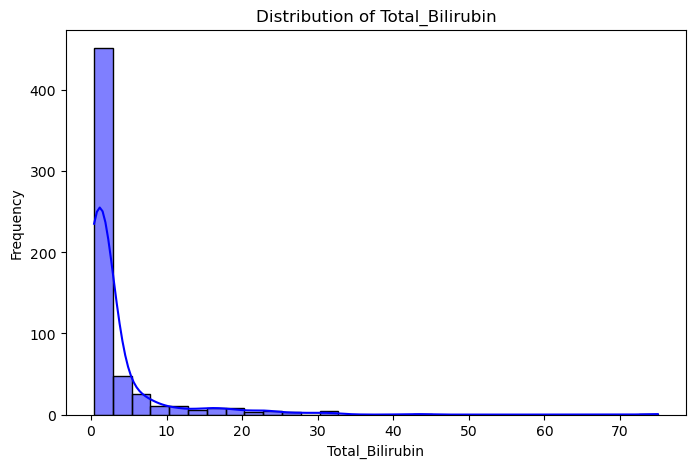

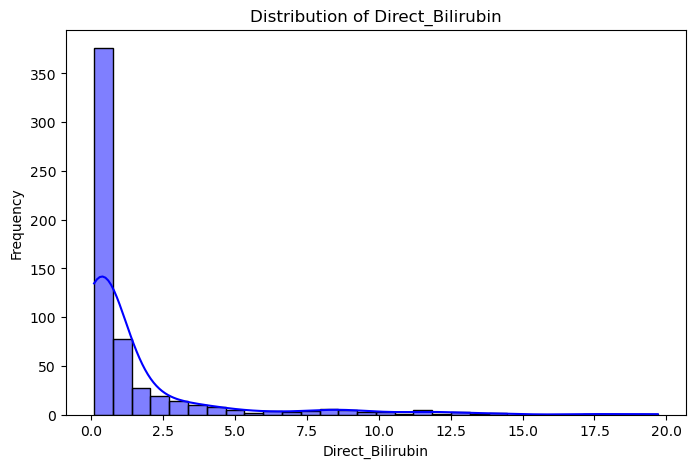

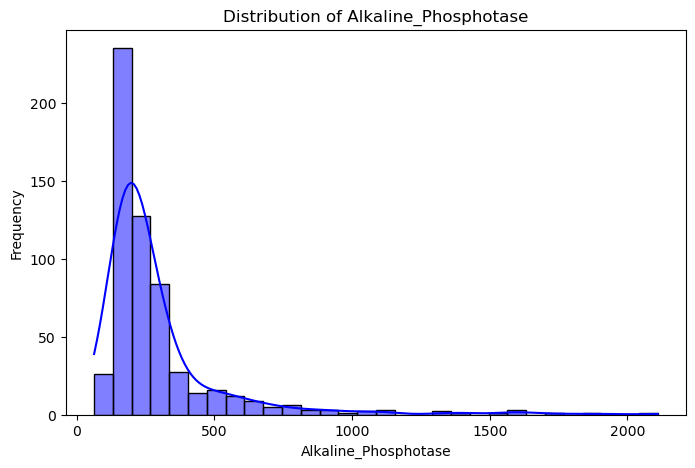

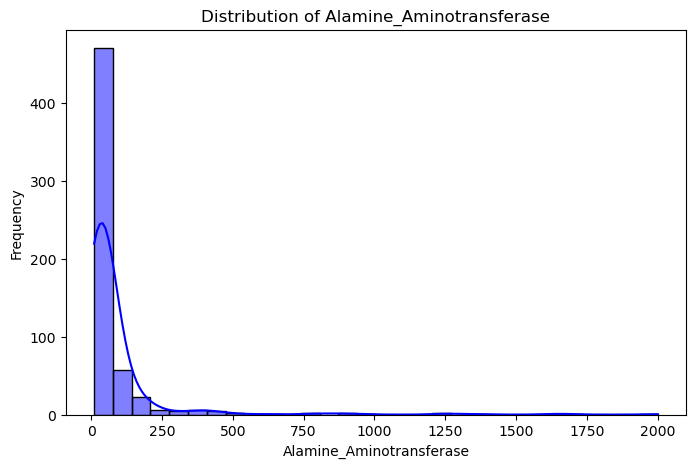

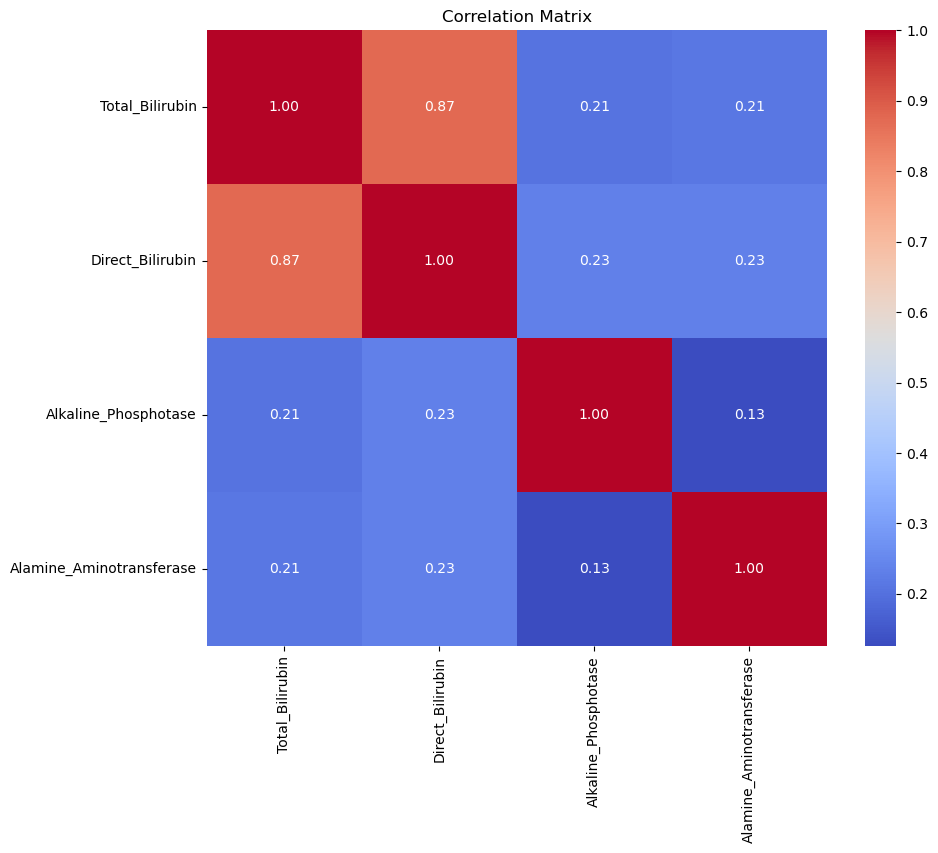

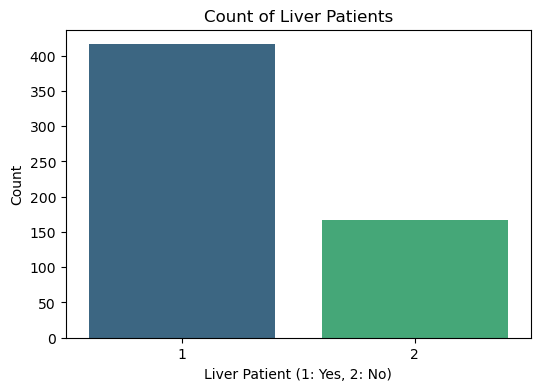

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

your_dataframe = pd.read_csv('indian_liver_patient.csv')

# Display basic information about the dataset
print(your_dataframe.info())

# Display summary statistics for numerical columns
print(your_dataframe.describe())

# Visualize the distribution of numerical features
num_features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']

for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(your_dataframe[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the correlation between numerical features
correlation_matrix = your_dataframe[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize the count of different values in the 'Dataset' column (assuming it represents liver patient status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Dataset', data=your_dataframe, palette='viridis')
plt.title('Count of Liver Patients')
plt.xlabel('Liver Patient (1: Yes, 2: No)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
# your_dataframe = pd.read_csv('/content/indian_liver_patient.csv')

# Handle missing values
# your_dataframe.fillna(your_dataframe.mean(), inplace=True)

# Select numerical features for clustering
numerical_features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

X_clustering = your_dataframe[numerical_features]
# Scale the data
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)
print(X_clustering_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
your_dataframe['Cluster'] = kmeans.fit_predict(X_clustering_scaled)

# Visualize the clustering results
for cluster in your_dataframe['Cluster'].unique():
    cluster_data = your_dataframe[your_dataframe['Cluster'] == cluster]
    plt.scatter(cluster_data['Alkaline_Phosphotase'], cluster_data['Total_Bilirubin'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Alkaline_Phosphotase')
plt.ylabel('Total_Bilirubin')
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


your_dataframe = pd.read_csv('/content/indian_liver_patient.csv')

# Handle missing values
your_dataframe.fillna(your_dataframe.mean(), inplace=True)


le = LabelEncoder()
your_dataframe['Gender'] = le.fit_transform(your_dataframe['Gender'])

# Define features (X) and target variable (y)
X = your_dataframe.drop('Dataset', axis=1)
y = your_dataframe['Dataset']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
